# Applying Machine Learning

## Importing Dataset and Conversion from .arff

In [23]:
# Website Phishing data from https://archive.ics.uci.edu/dataset/379/website+phishing
path = "PhishingData.arff"

print("Dataset file path:", path)

Dataset file path: PhishingData.arff


In [24]:
import pandas as pd
from scipy.io import arff

# arff.loadarff necessary for arff file format
data = arff.loadarff(path)

# extracting column names and convert into dataframe
df = pd.DataFrame(data[0])

# decode byte strings to regular strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

df.head(15)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB


## Step 1: Select Features (X) and Target (y)

In [26]:
# features: the 9 website characteristics
X = df.drop('Result', axis=1)
y = df['Result']

print("Features:", X.columns.tolist())
print(f"\nDistribution:")
print(y.value_counts().sort_index())

Features: ['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']

Distribution:
Result
-1    702
0     103
1     548
Name: count, dtype: int64


## Step 2: Train-Test Split


In [27]:
from sklearn.model_selection import train_test_split

# distributes proportions of labels across test-train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 1014 samples
Testing set: 339 samples


## Step 3: Train Multiple Models

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# initializing models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=4)
}

# training models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained")

Random Forest trained
Logistic Regression trained
Decision Tree trained
KNN trained


## Step 4: Evaluate on Test Set

In [29]:
from sklearn.metrics import accuracy_score, classification_report

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.5f}")
    print(classification_report(y_test, y_pred, target_names=['Phishy', 'Suspicious', 'Legitimate']))


Random Forest:
Accuracy: 0.89086
              precision    recall  f1-score   support

      Phishy       0.92      0.90      0.91       176
  Suspicious       0.86      0.69      0.77        26
  Legitimate       0.86      0.91      0.88       137

    accuracy                           0.89       339
   macro avg       0.88      0.84      0.85       339
weighted avg       0.89      0.89      0.89       339


Logistic Regression:
Accuracy: 0.84071
              precision    recall  f1-score   support

      Phishy       0.86      0.89      0.88       176
  Suspicious       0.50      0.08      0.13        26
  Legitimate       0.82      0.92      0.87       137

    accuracy                           0.84       339
   macro avg       0.73      0.63      0.63       339
weighted avg       0.82      0.84      0.82       339


Decision Tree:
Accuracy: 0.87611
              precision    recall  f1-score   support

      Phishy       0.89      0.91      0.90       176
  Suspicious       0.

## Step 5: Select Best Model


In [30]:
# comparing models
comparison_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())}).sort_values('Accuracy', ascending=False)

print("Model Comparison:")
print(comparison_df.to_string(index=False))

# showing best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\nBest Model is... {best_model_name}")
print(f"Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")

Model Comparison:
              Model  Accuracy
      Random Forest  0.890855
                KNN  0.887906
      Decision Tree  0.876106
Logistic Regression  0.840708

Best Model is... Random Forest
Accuracy: 0.8909


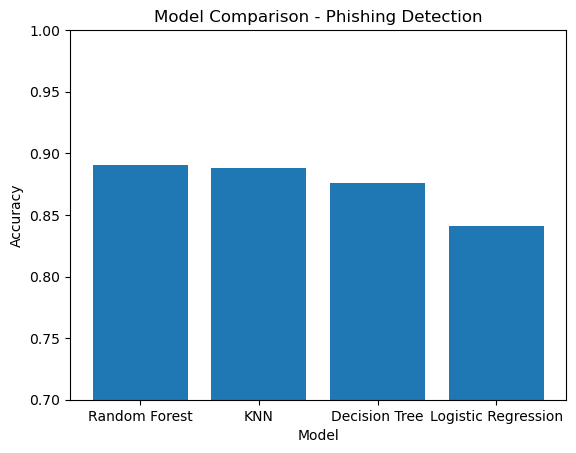

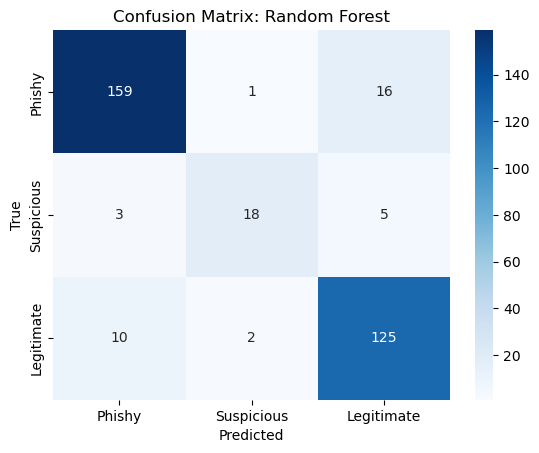

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# BAR CHART

plt.bar(comparison_df['Model'], comparison_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Phishing Detection')
plt.ylim([0.7, 1.0])
plt.show()


# CONFUSION MATRIX

# generating predictions
y_pred = best_model.predict(X_test)

cf = confusion_matrix(y_test, y_pred)

labels = ['Phishy', 'Suspicious', 'Legitimate']

sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

## Step 6: Predict on New Data Points


In [32]:
# creating new website examples with feature values
new_websites_data = {                      # Possible values for each feature
    'SFH':               [-1,  0,  1, -1],   # -1: Legitimate, 0: Suspicious, 1: Phishy
    'popUpWidnow':       [-1,  0,  1,  0],   
    'SSLfinal_State':    [-1,  0,  1, -1],   
    'Request_URL':       [-1,  0,  1, -1],   
    'URL_of_Anchor':     [-1,  0,  1, -1],   
    'web_traffic':       [-1,  0,  1, -1],   
    'URL_Length':        [-1,  0,  1,  0],   
    'age_of_domain':     [-1,  1,  1, -1],   # -1: Old (Legit), 1: New (Phishy)
    'having_IP_Address': [ 1,  0,  0,  1]    #  1: No IP (Legit), 0: Has IP (Phishy)
}
# converting all values to integers to match the training data's dtype
new_websites = pd.DataFrame(new_websites_data).astype(int)

descriptions = [
    "Established bank (good SSL, old domain)",
    "Suspicious site (poor SSL, uses IP)",
    "Likely phishing (no SSL, new domain)",
    "Trusted e-commerce (strong security)"
]

In [33]:
# making the predictions
predictions = best_model.predict(new_websites)

# displaying results
label_map = {1: 'Legitimate', 0: 'Suspicious', -1: 'Phishy'}

print(f"\nPredictions using {best_model_name}:\n")

for i in range(len(descriptions)):
    print(f"{descriptions[i]}")
    print(f"- Classification: {label_map[int(predictions[i])]}\n")


Predictions using Random Forest:

Established bank (good SSL, old domain)
- Classification: Legitimate

Suspicious site (poor SSL, uses IP)
- Classification: Suspicious

Likely phishing (no SSL, new domain)
- Classification: Phishy

Trusted e-commerce (strong security)
- Classification: Legitimate

